# Basic Keras

---
<b>Author</b>: Sterling Cutler
<br>
<b>Date</b>: 03/18/18
<br>
<b>Overview</b>: This notebook covers some basic features in Keras including Convolutional Neural Net (CNN), image augmentation, and layer freezing.

In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import History

Using TensorFlow backend.


In [0]:
# Define training parameters
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 30

In [0]:
# Track CIFAR 10 labels
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# Load train/test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# One hot encode target labels
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
# Convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

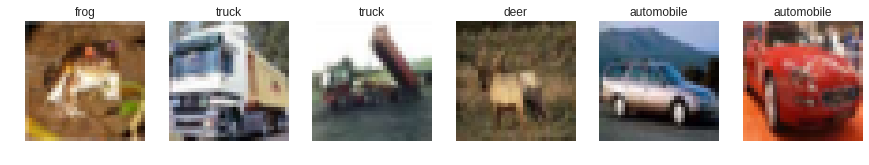

In [7]:
# Create sample images and show unaugmented
import numpy as np

sample_images = x_train[:6]
sample_labels = y_train[:6]

fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
for i in range(6):
  axes[0, i].axis('off')
  axes[0, i].set_title(labels[np.argmax(sample_labels[i])])
  axes[0, i].imshow(sample_images[i])

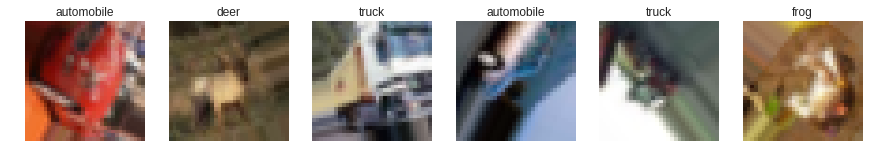

In [8]:
# Randomly shift, rotate, and flip images
srf_datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

for X_batch, y_batch in srf_datagen.flow(sample_images, 
                                         sample_labels, 
                                         batch_size=6):
  fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
  for i in range(6):
    axes[0, i].axis('off')
    axes[0, i].set_title(labels[np.argmax(y_batch[i])])
    axes[0, i].imshow(X_batch[i])
  break

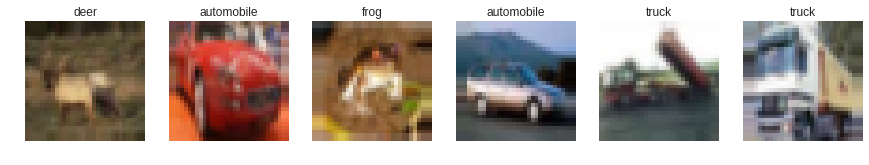

In [9]:
# Zoom in/out and shear images
zoom_datagen = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    shear_range=0.45)

for X_batch, y_batch in zoom_datagen.flow(sample_images, 
                                          sample_labels, 
                                          batch_size=6):
  fig, axes = plt.subplots(1, 6, squeeze=False, figsize=(15, 15))
  for i in range(6):
    axes[0, i].axis('off')
    axes[0, i].set_title(labels[np.argmax(y_batch[i])])
    axes[0, i].imshow(X_batch[i])
  break

In [0]:
# Define CNN model architecture
feature_layers = [
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES),
    Activation('softmax')
]

In [0]:
# Build and compile model
model = Sequential(feature_layers + classification_layers)

hist = History()
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
# Train CNN model with image augmentation
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

model.fit_generator(datagen.flow(x_train, y_train, 
                        batch_size=BATCH_SIZE), 
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        callbacks=[hist], 
                        verbose=0)

print('Finished training')

Finished training


In [14]:
# Score trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 179us/step
Test loss: 0.8376815577507019
Test accuracy: 0.7094


In [0]:
# Freeze feature layers and recompile
for l in feature_layers:
    l.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
# Train CNN model without image augmentation but with pretrained weights
model.fit(x_train, y_train, batch_size=BATCH_SIZE, 
          epochs=EPOCHS, callbacks=[hist], verbose=0)

print('Finished training')

Finished training


In [17]:
# Score final model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 174us/step
Test loss: 0.6876614492416382
Test accuracy: 0.7614
